Файл truck.xlsx представляет собой реальную выгрузку данных с бортовых систем большегрузных автосамосвалов одного из горнодобывающих предприятий за некоторое время. Раз в четыре секунды со всех активных агентов (самосвалов) считывалась следующая информация:<br />
Time - системные дата и время;<br />
control id - системный идентификатор агента;<br />
Vehicle_type - тип агента (самосвал или экскаватор);<br />
vehicle_id - идентификатор физического агента (бортовой номер самосвала);<br />
lat - значение широты по GPS в момент времени;<br />
lon - значение долготы по GPS в момент времени;<br />
height - значение высоты по GPS в момент времени;<br />
Course - значение направления движения (азимут) по GPS;<br />
speed - скорость движения;<br />
X - значение широты в неизвестной координатной сетке;<br />
Y - значение долготы в неизвестной координатной сетке;<br />
distance - расстояние, которое преодолел самосвал с предыдущего момента времени;<br />
fuel - количество топлива в баке;<br />
weight  - вес груза в кузове в момент времени;<br />
num_satellite - количество видимых спутников в момент времени;<br />
gps_quality - качество (точность) значений координат GPS;<br />
sender - неизвестное значение;<br />
link_quality - качество (точность?) связи;<br />
mes_number - пустое неизвестное значение;<br />
type - неизвестное значение;<br />
received - неизвестное значение;<br />
fix_status - количество изменений статуса.

<b>Task 1</b><br />
1. Построить временные графики и провести стат.анализ для выявления аномальных отклонений в параметрах. Почистить выбросы_Аномальные участки не соответствующие нормальному распределению данных (например, азимут должен быть от -180 до 180, все остальное мусор)

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
Normalization?
Height?
weight?
satellite =0?

In [195]:
#Read data
df = pd.read_csv("truck.csv")
df

,Time,course,control_id,lon,speed,lat,num_satellites,weight,height
0,08:02:19,251.000000,31107,37.723074,0.00,51.255468,4,0,63.836127
1,08:02:19,251.000000,31107,37.723074,0.00,51.255468,3,0,63.836127
2,08:02:19,125.000000,31106,37.717123,30.00,51.259548,3,0,-33.943062
3,08:02:19,125.000000,31106,37.717123,30.00,51.259548,2,0,-33.943062
4,08:02:19,125.000000,31106,37.717123,30.00,51.259548,3,0,-33.943062
...,...,...,...,...,...,...,...,...,...
484060,11:57:07,NaN,31053,37.724873,0.00,51.266981,2,0,0.000000
484061,11:57:07,NaN,31053,37.724873,0.00,51.266981,3,0,0.000000
484062,11:57:07,-19.435771,31107,37.717200,27.95,51.254866,4,0,72.402977
484063,11:57:07,17.436212,31108,37.720027,28.62,51.261218,4,0,-65.911112


In [5]:
df=df.set_index('Time')
df

,course,control_id,lon,speed,lat,num_satellites,weight,height
Time,,,,,,,,
08:02:19,251.000000,31107,37.723074,0.00,51.255468,4,0,63.836127
08:02:19,251.000000,31107,37.723074,0.00,51.255468,3,0,63.836127
08:02:19,125.000000,31106,37.717123,30.00,51.259548,3,0,-33.943062
08:02:19,125.000000,31106,37.717123,30.00,51.259548,2,0,-33.943062
08:02:19,125.000000,31106,37.717123,30.00,51.259548,3,0,-33.943062
...,...,...,...,...,...,...,...,...
11:57:07,NaN,31053,37.724873,0.00,51.266981,2,0,0.000000
11:57:07,NaN,31053,37.724873,0.00,51.266981,3,0,0.000000
11:57:07,-19.435771,31107,37.717200,27.95,51.254866,4,0,72.402977


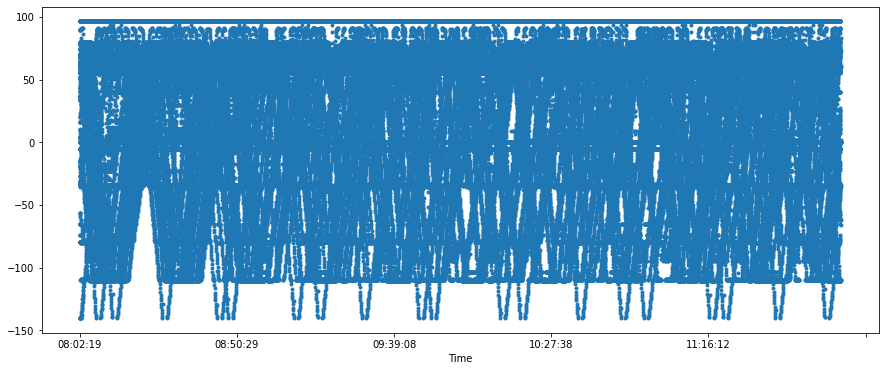

In [7]:
df1=df['height']
df1.plot(style=".", figsize=(15, 6))
plt.savefig("data.png")
plt.show()

We can see that objects exist  with height less than zero. We should delete them

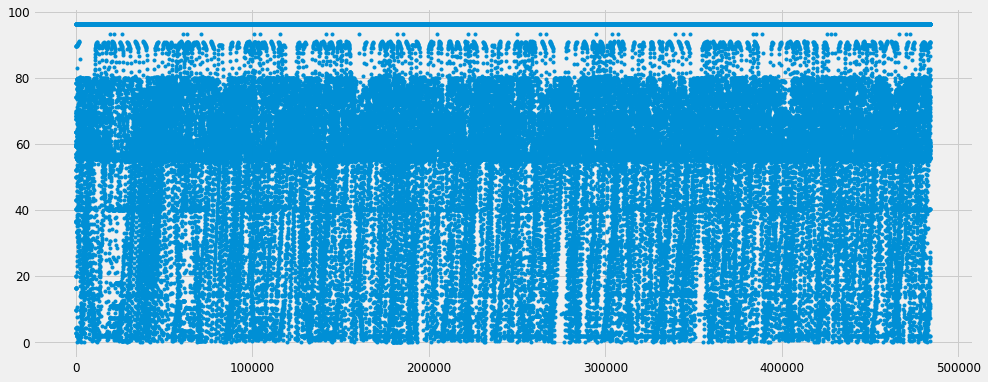

In [227]:
df = df[df.height > 0]
df1=df['height']
df1.plot(style=".", figsize=(15, 6))
plt.savefig("data.png")
plt.show()

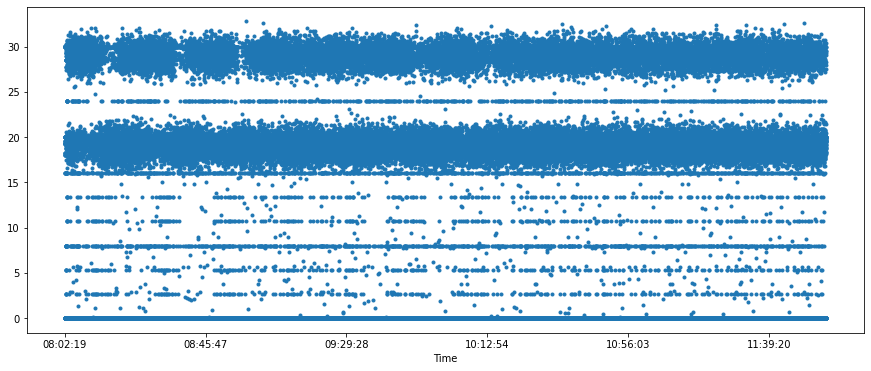

In [9]:
df1=df['speed']
df1.plot(style=".", figsize=(15, 6))
plt.savefig("data.png")
plt.show()

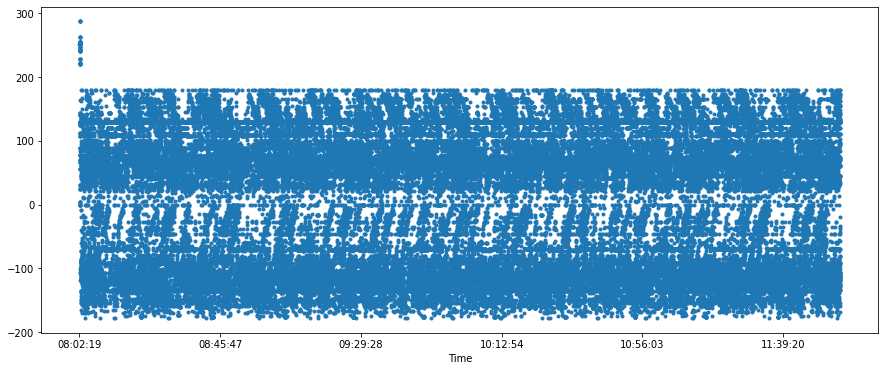

In [10]:
df1=df['course']
df1.plot(style=".", figsize=(15, 6))
plt.savefig("data.png")
plt.show()

Course should be between -180 and 180

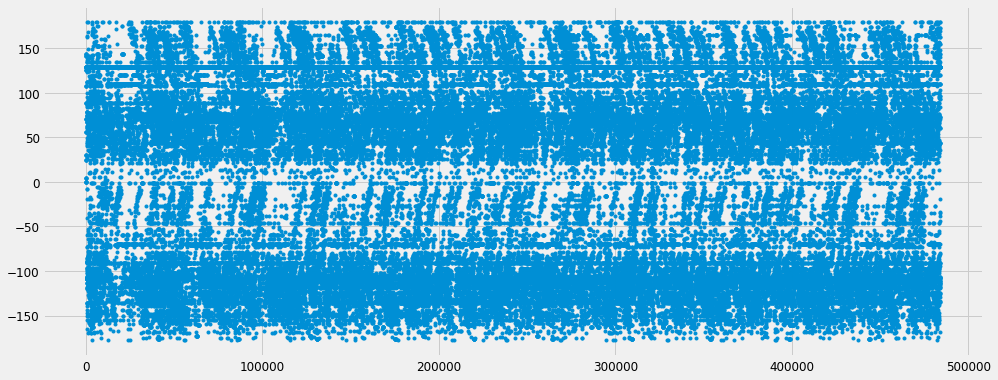

In [228]:
df = df[(df.course < 180) & (df.course > -180)]
df1=df['course']
df1.plot(style=".", figsize=(15, 6))
plt.savefig("data.png")
plt.show()

In [230]:
df

,Time,course,control_id,lon,speed,lat,num_satellites,weight,height
57,2020-11-12 08:02:20,107.000000,31119,37.716383,20.00,51.256480,4,114,68.614850
58,2020-11-12 08:02:20,107.000000,31119,37.716383,20.00,51.256480,3,114,68.614850
59,2020-11-12 08:02:20,107.000000,31119,37.716383,20.00,51.256480,3,114,68.614850
60,2020-11-12 08:02:20,107.000000,31119,37.716383,20.00,51.256480,3,114,68.614850
73,2020-11-12 08:02:20,143.000000,31115,37.715998,19.18,51.256054,2,35,74.431158
...,...,...,...,...,...,...,...,...,...
484045,2020-11-12 11:57:06,-134.606976,31113,37.712762,18.30,51.266410,3,115,56.031872
484052,2020-11-12 11:57:06,-111.719177,31129,37.726094,18.82,51.259016,4,44,60.281371
484054,2020-11-12 11:57:06,110.174062,31139,37.745496,0.00,51.258468,4,74,1.843068
484058,2020-11-12 11:57:07,-106.699313,31109,37.730175,19.61,51.259925,4,41,60.705665


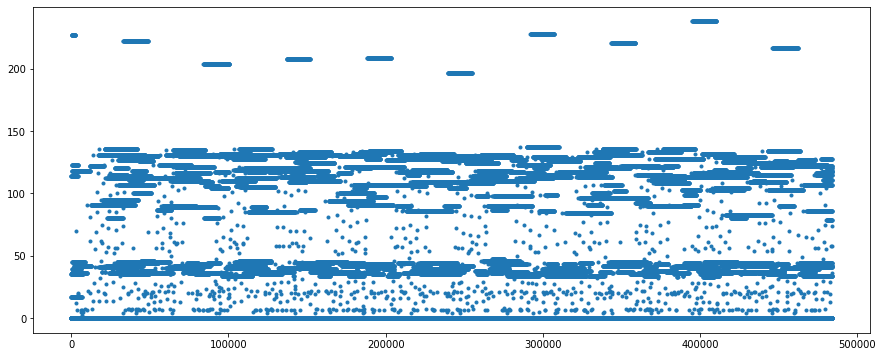

In [198]:
df1=df['weight']
df1.plot(style=".", figsize=(15, 6))
plt.savefig("data.png")
plt.show()

Weight should be > 0

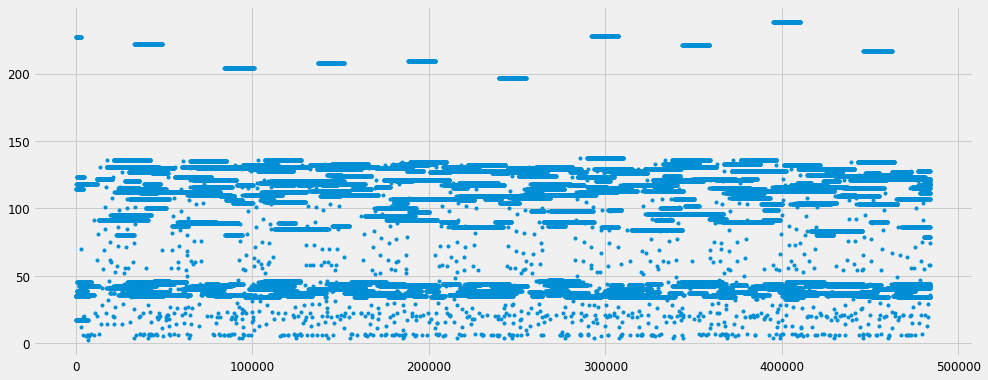

In [229]:
df = df[df.weight > 0]
df1=df['weight']
df1.plot(style=".", figsize=(15, 6))
plt.savefig("data.png")
plt.show()

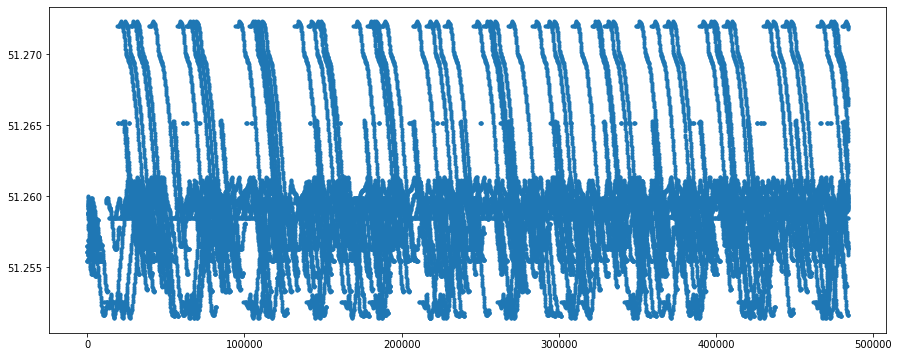

51.2722904125212 51.2514324444627


In [200]:
df1=df['lat']
df1.plot(style=".", figsize=(15, 6))
plt.savefig("data.png")
plt.show()
print(max(df1), min(df1))

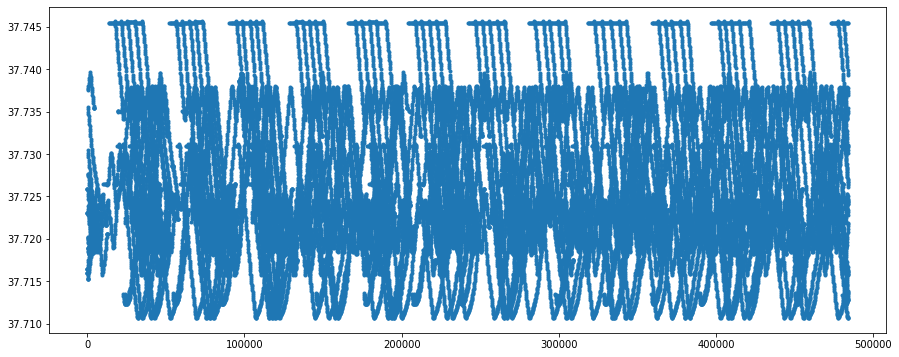

37.745633006624296 37.7106592747556


In [201]:
df1=df['lon']
df1.plot(style=".", figsize=(15, 6))
plt.savefig("data.png")
plt.show()
print(max(df1), min(df1))

In [19]:
df1=df['control_id']
print(max(df1), min(df1))
df1=df['num_satellites']
print(max(df1), min(df1))

311011 31100
5 0


<b>Task 2</b><br />
Оценить изменение скорости относительно веса перевозимого груза для разных самосвалов и определить необходимость или её отсутствие для масштабирования параметра перевозимого груза в момент времени (weight) .

Graph of all weights compared with according speeds

<AxesSubplot:xlabel='speed'>

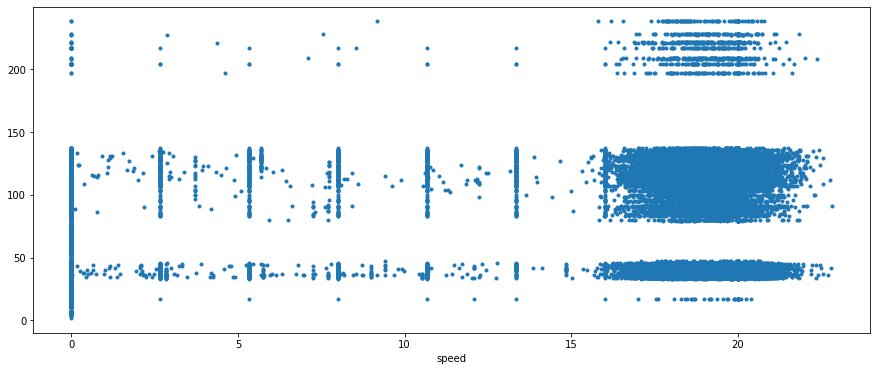

In [20]:
dd=df.set_index('speed')
df1=dd['weight']

df1.plot(style=".", figsize=(15, 6))

Graph of speed for each vehicle weight with according speed

31119


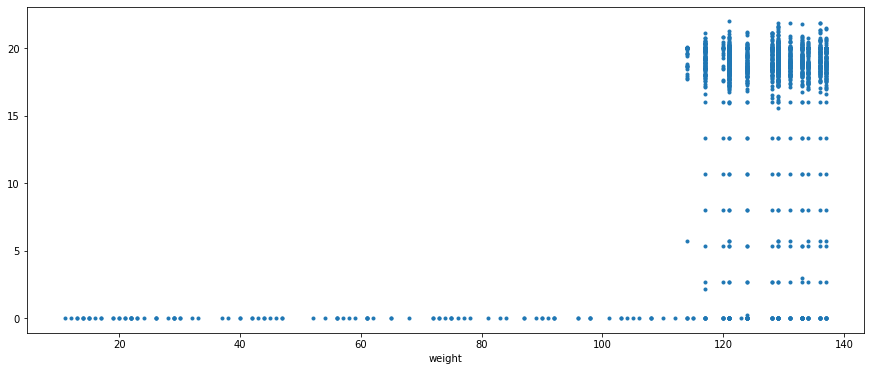

31115


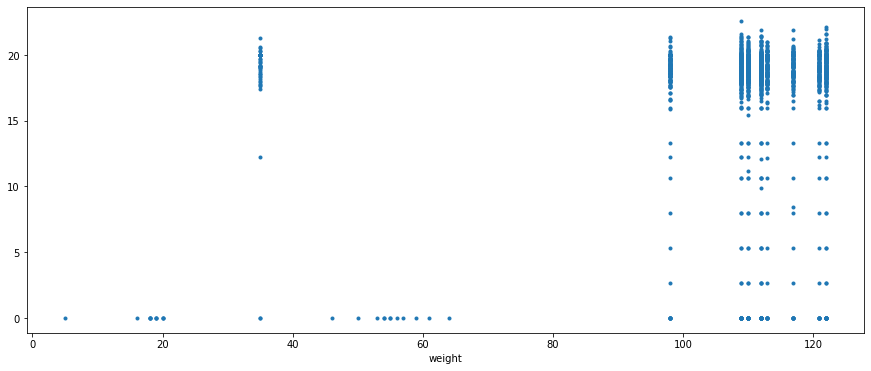

31109


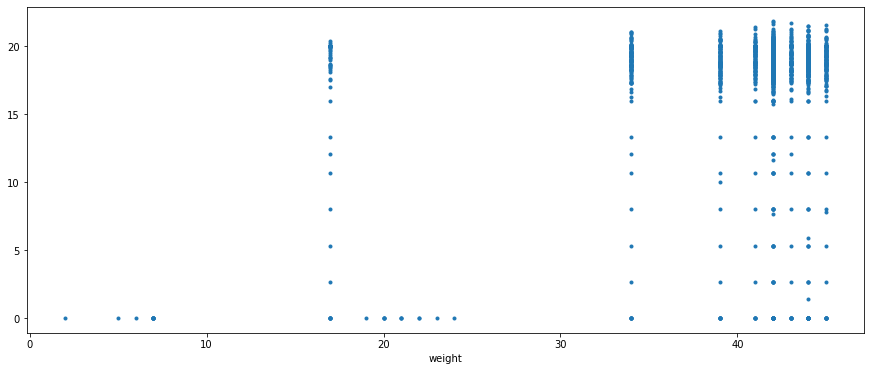

31121


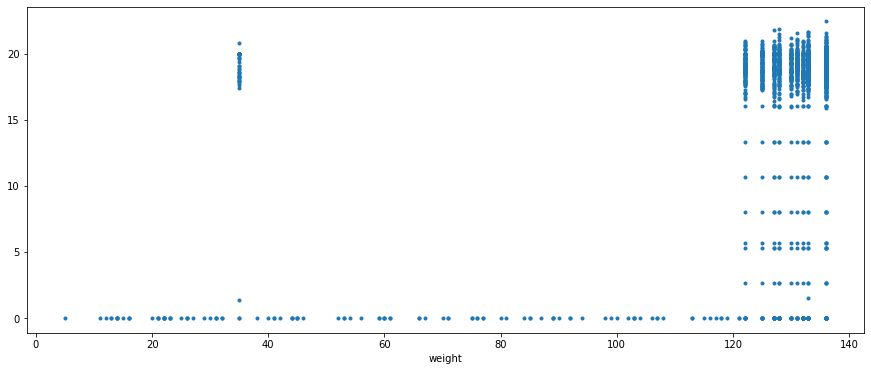

31132


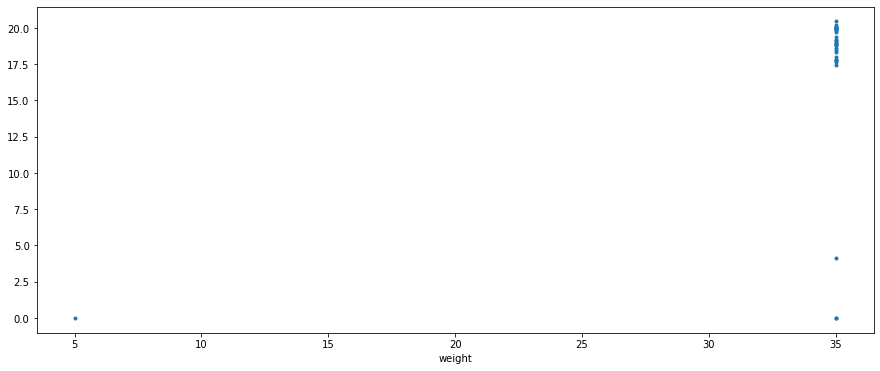

31100


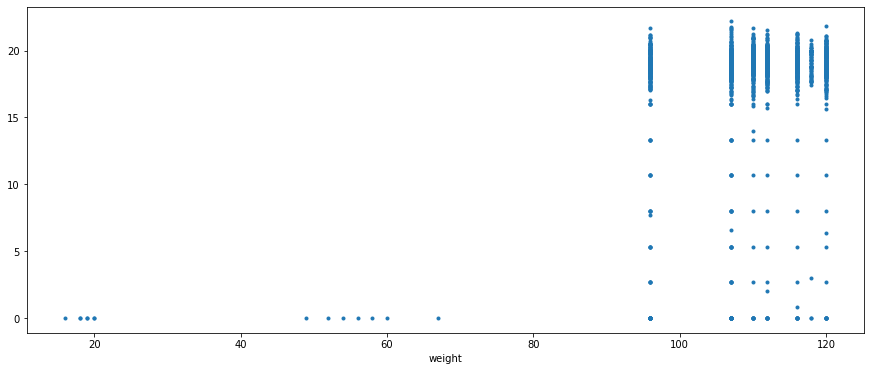

31151


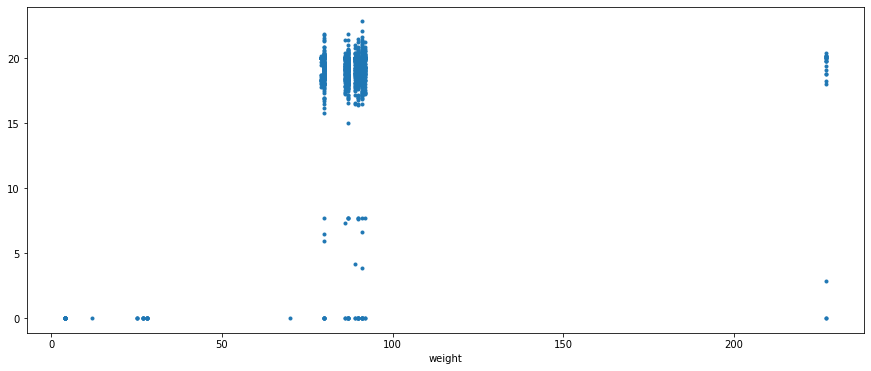

31118


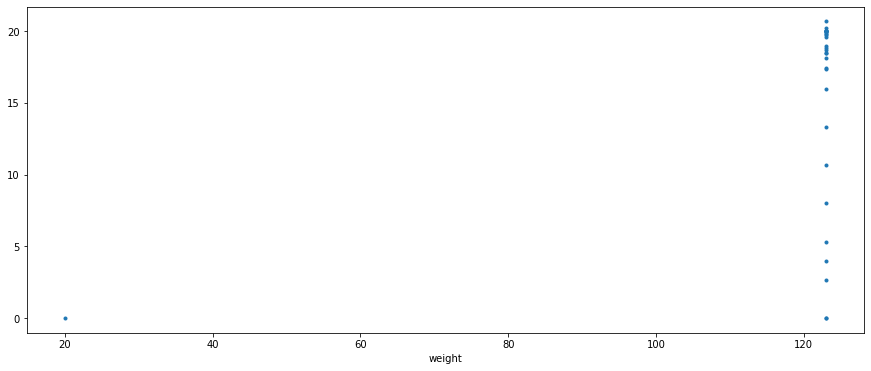

31116


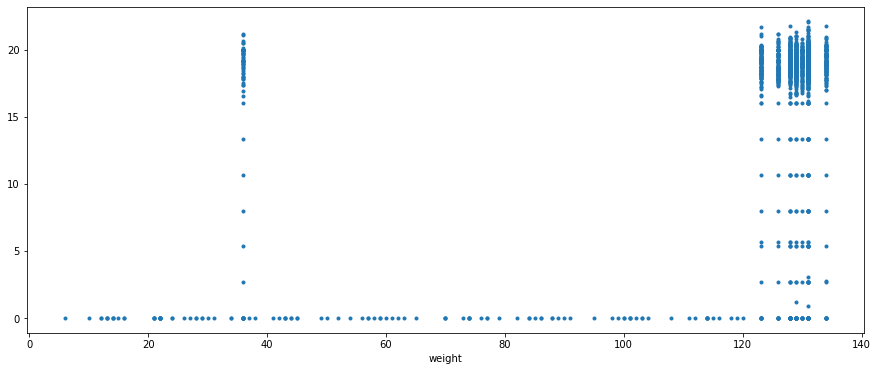

311011


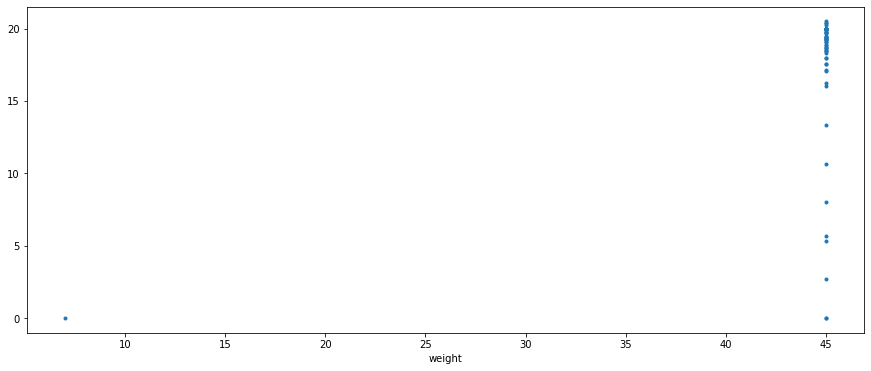

31139


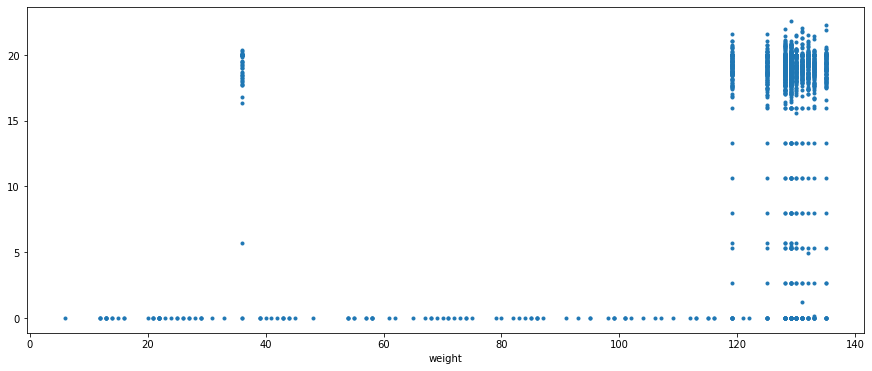

31127


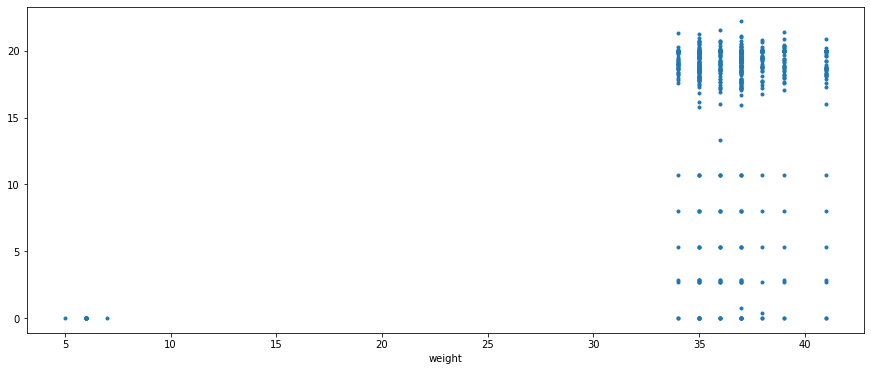

31125


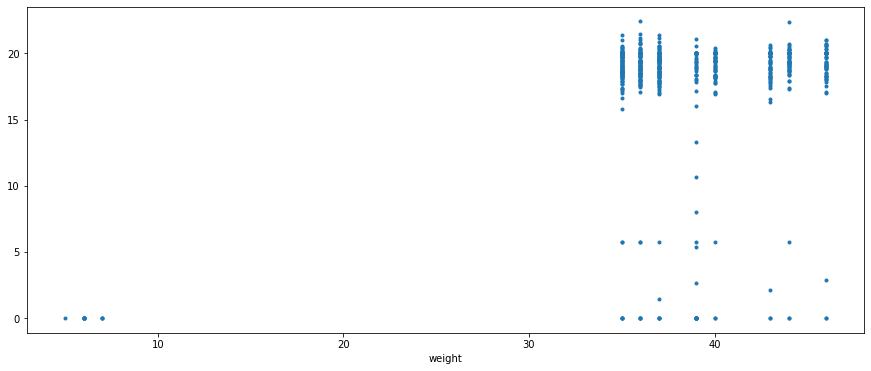

31138


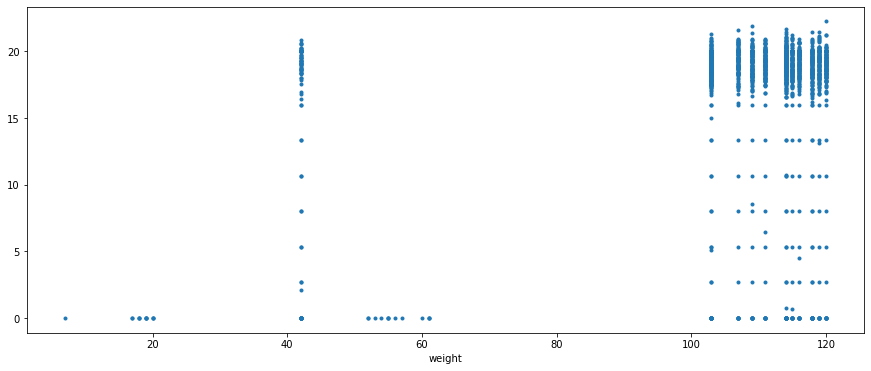

31153


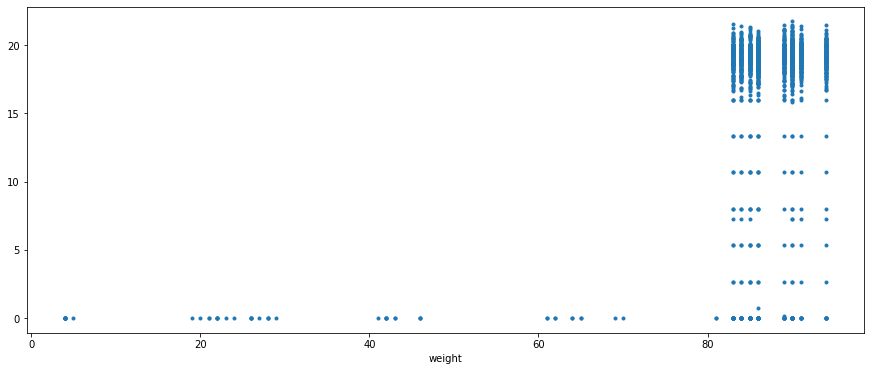

31110


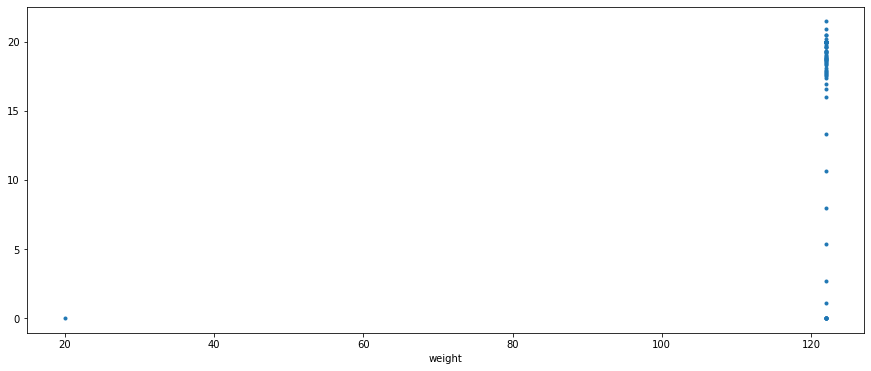

31106


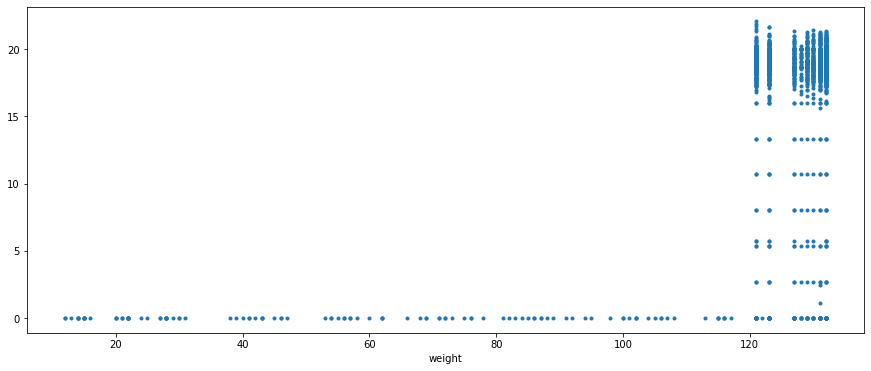

31129


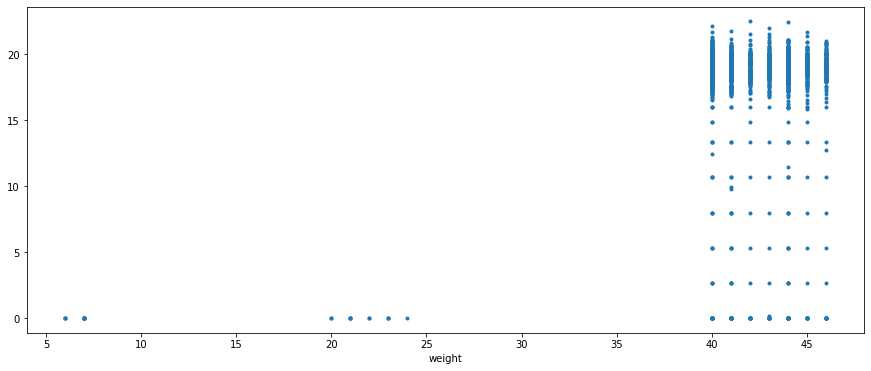

31113


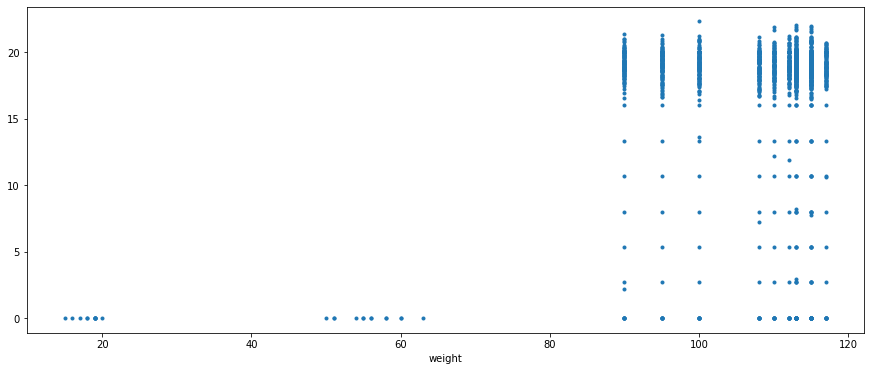

31136


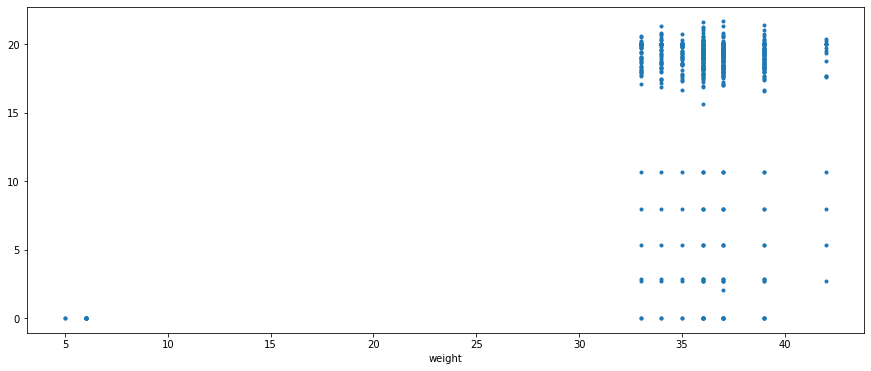

31142


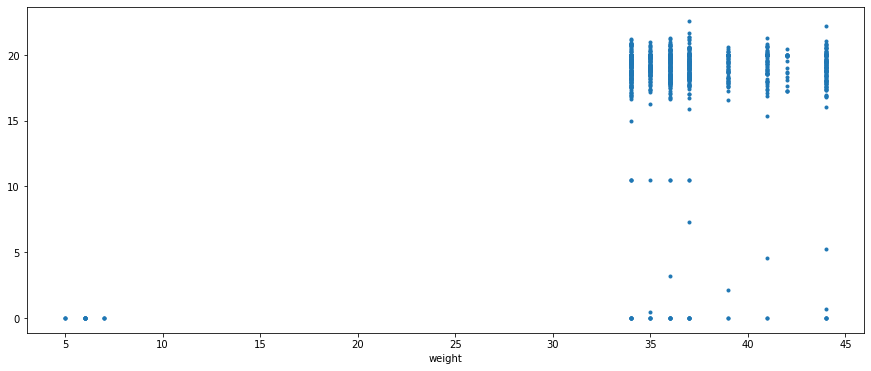

31120


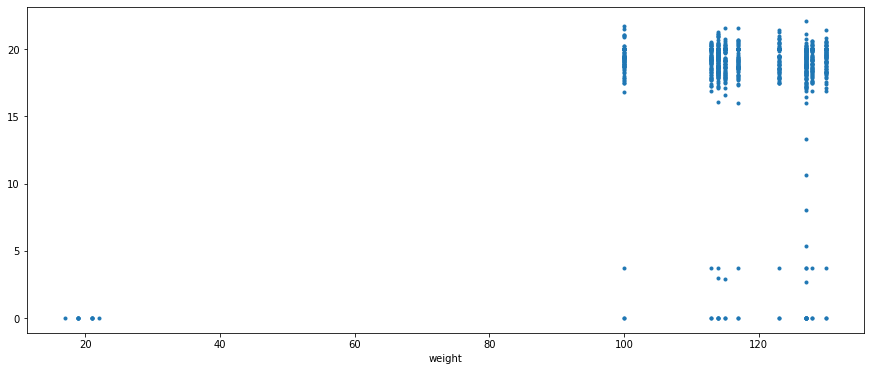

31141


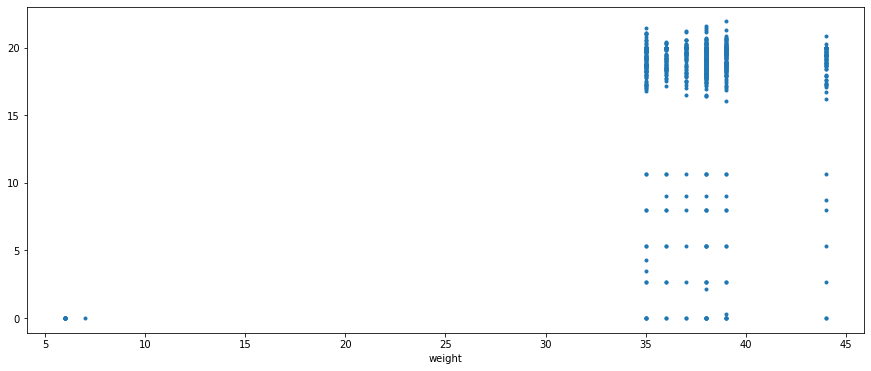

31104


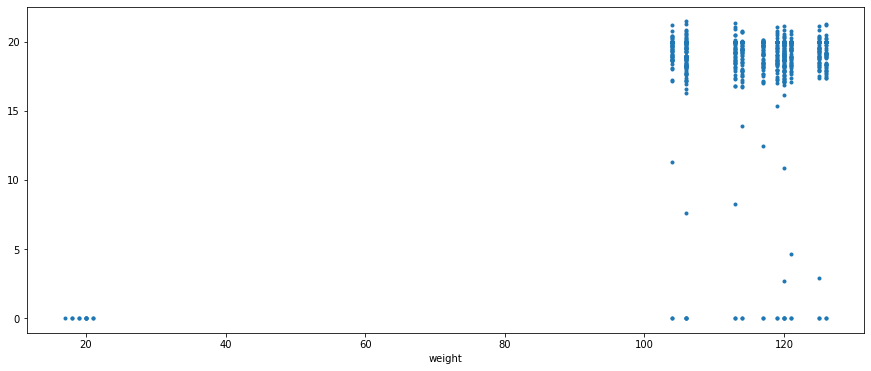

31108


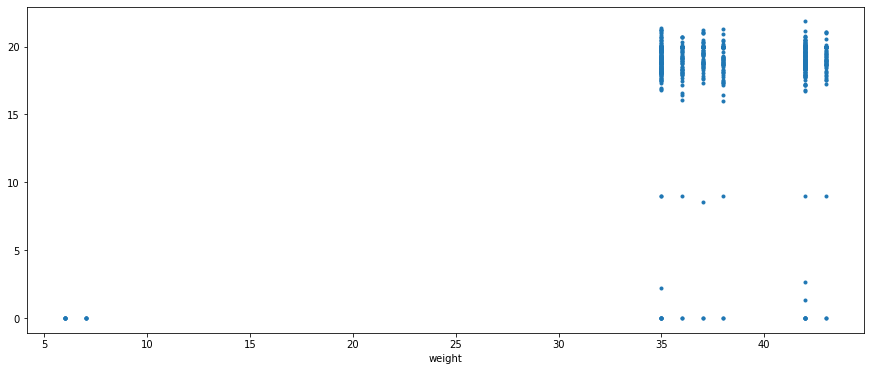

31126


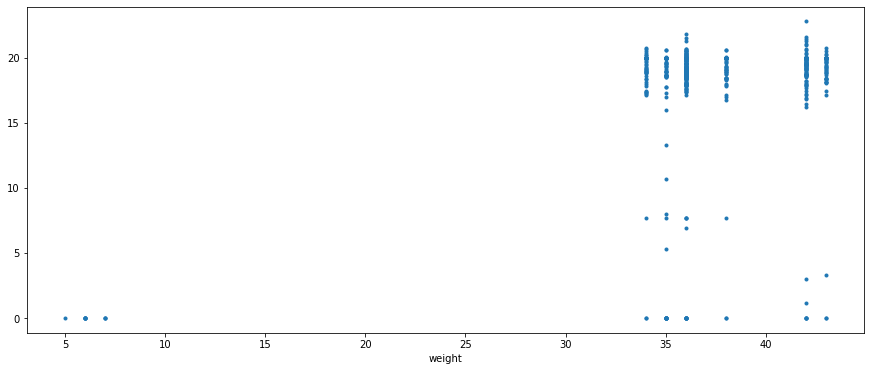

31103


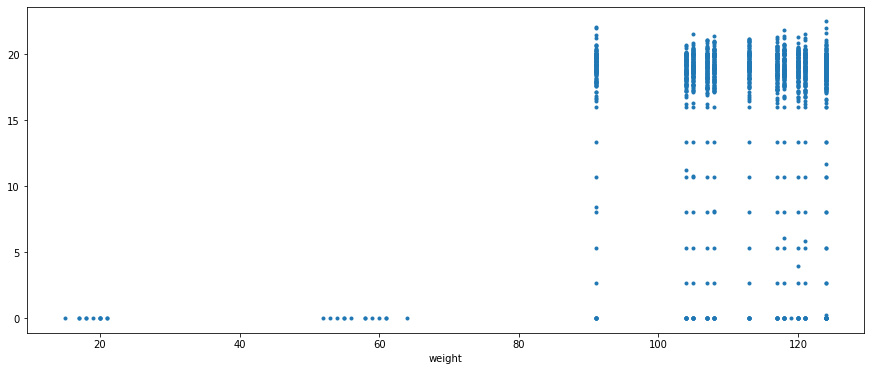

31101


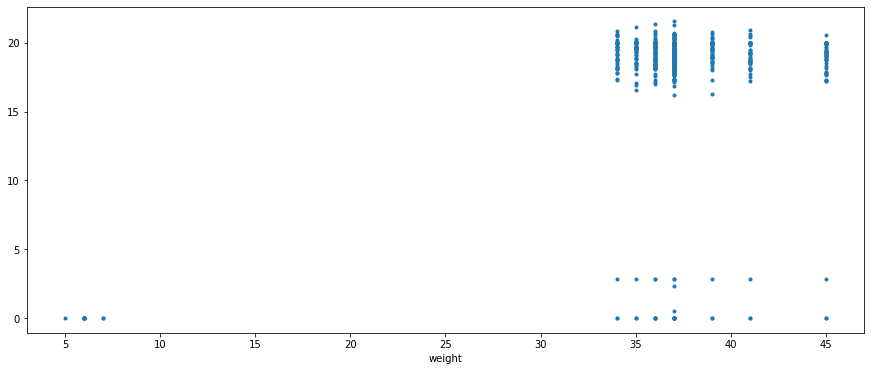

31102


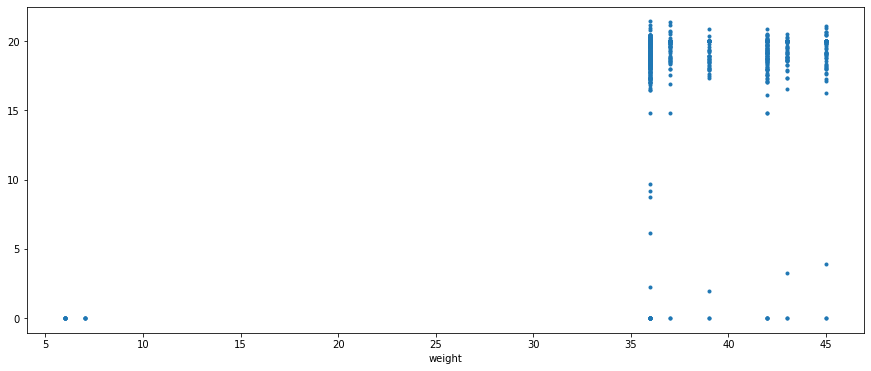

31131


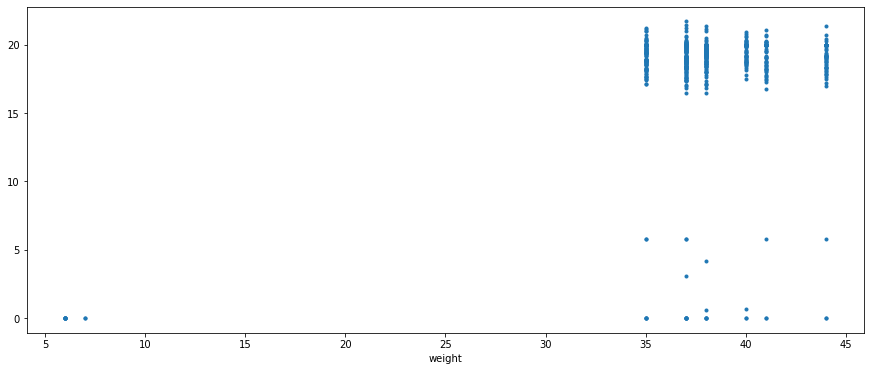

31152


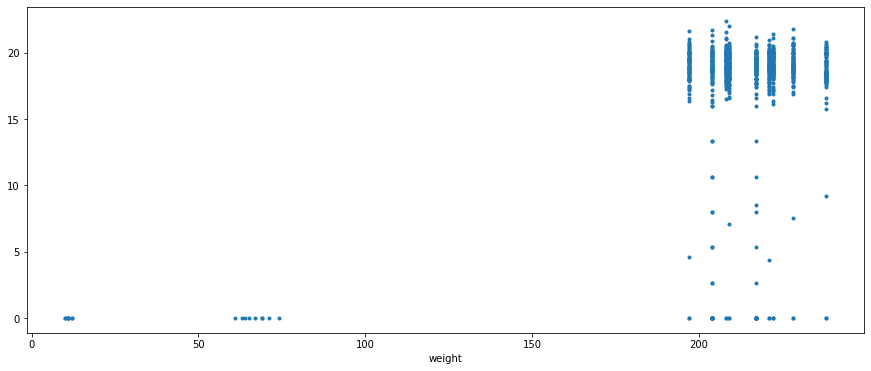

31117


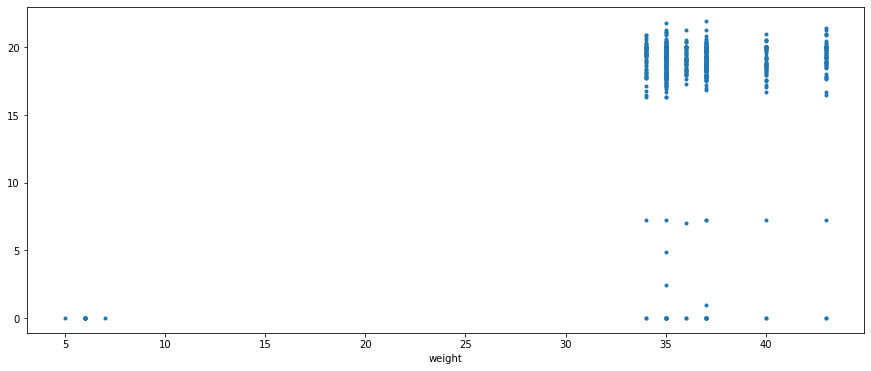

31133


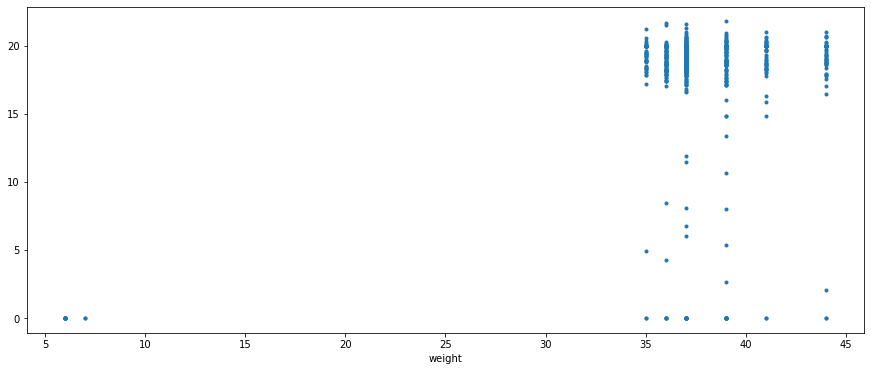

31122


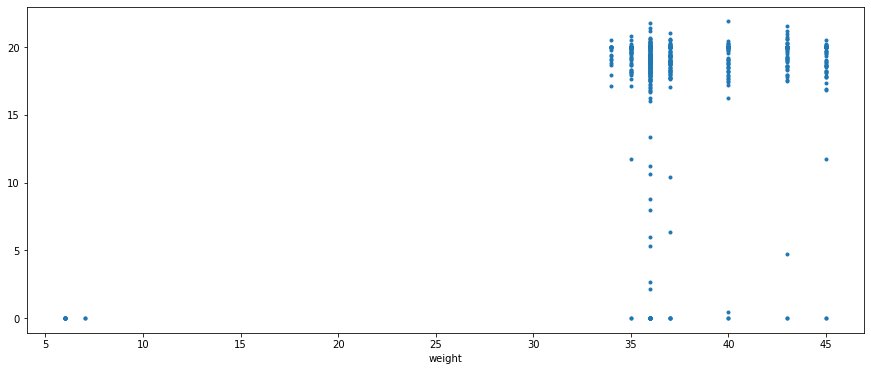

31137


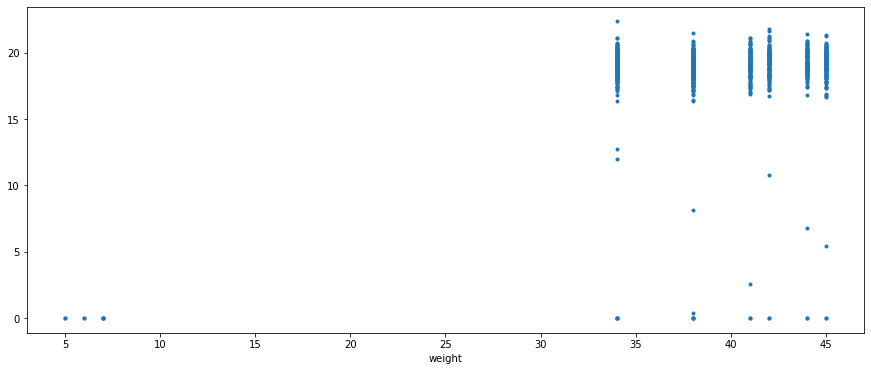

31128


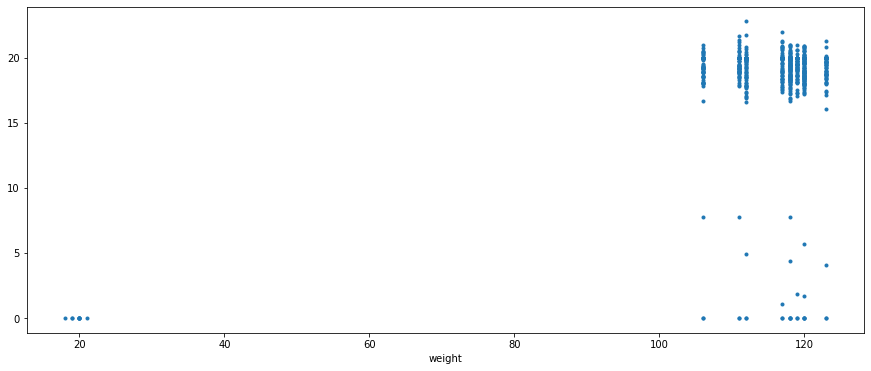

31112


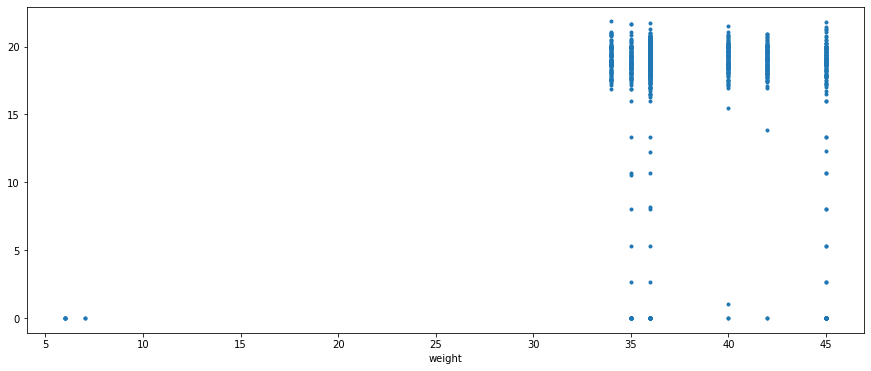

31135


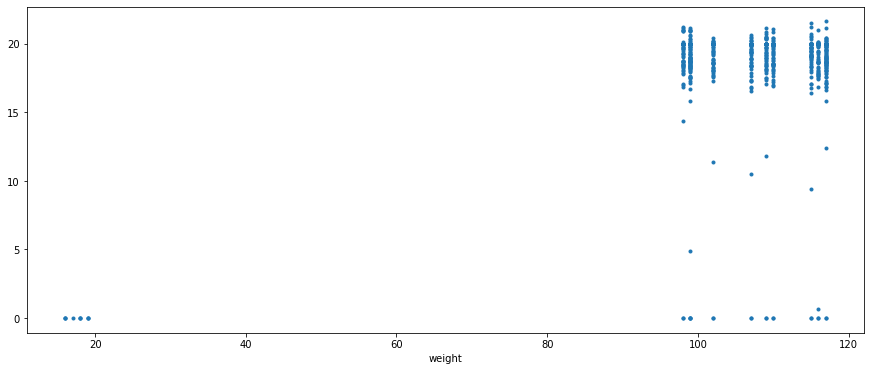

31107


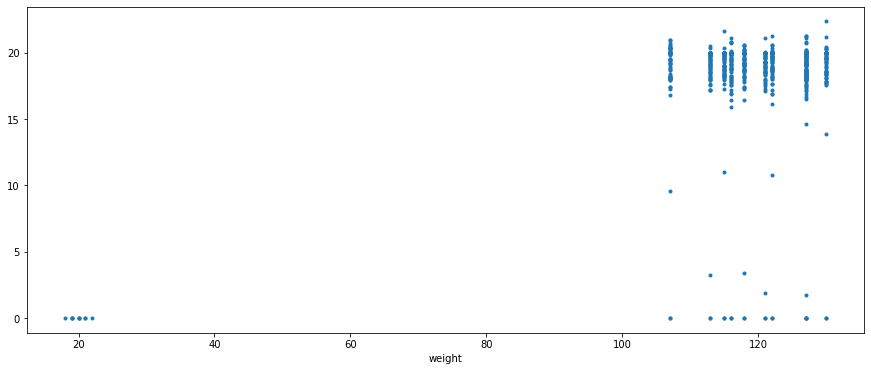

31124


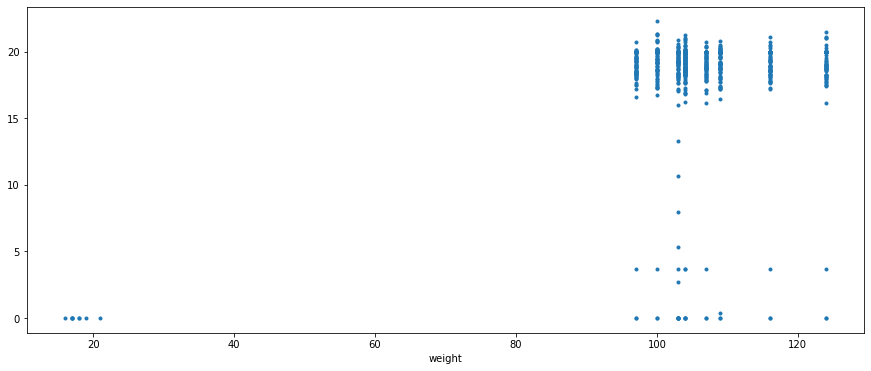

31111


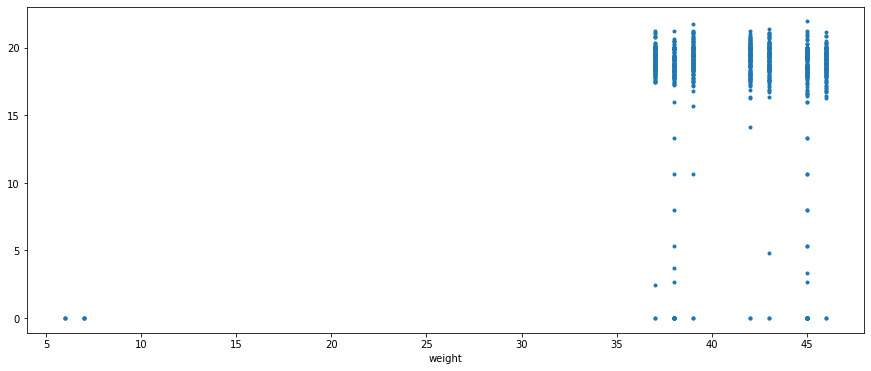

31123


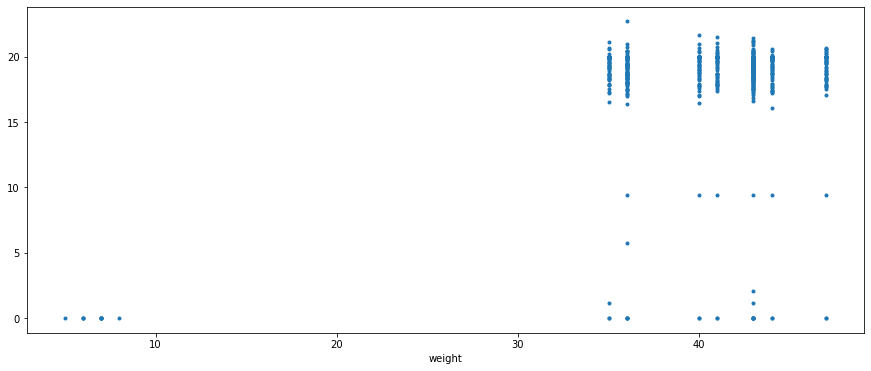

31199


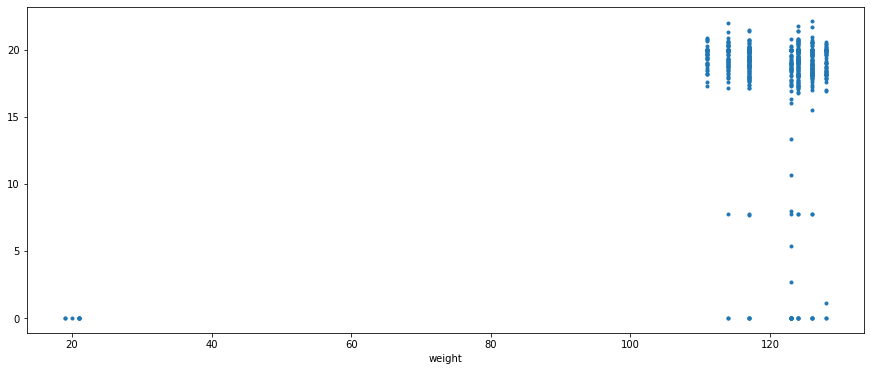

In [23]:
df_weights=df.set_index('weight')
control_ids = df_weights['control_id'].unique().tolist()
for x in control_ids:
    df2 = df_weights[df_weights.control_id == x]
    print(x)
    df1=df2['speed']
    df1.plot(style=".", figsize=(15, 6))
    plt.savefig("data.png")
    plt.show()

It looks like weight doesnt depend on speed

<b>Task 3</b><br />
<pre>3. Построить с использованием ИНС модель прогнозирования координат вида x^(t+1)=x(t)+V~(t), где x^(t+1) - прогнозное значение координат x,y,z (lat,lon,height) в следующий момент времени, x(t) - текущее значение координат, V~(t) - текущая скорость. При обучении можно использовать дополнительные параметры с целью повышения точности (azimut, weight). </pre>

<pre>Now, we will iterate throw all the control_id. for each class, we have the following:
input paramteres: x, y, z, speed, weight
output class X,Y,Z (they are x,y,z for the next moment for each type of cars.. that's why we will split them into groups, for each group we will remove the last line because it will have no output (no next X,Y,Z) </pre>

The system checks for cars each 4 seconds. So, we will check if the car exists in the next 4 second, and add it as an output

First, we create a data frame which has X,Y,Z columnsm in addition to the existing columns

In [207]:
df_full = pd.DataFrame(columns = list(df.columns) + ['X', 'Y', 'Z'])

Empty DataFrame
Columns: [course, control_id, lon, speed, lat, num_satellites, weight, height, X, Y, Z]
Index: []


In [211]:
df = df.reset_index()

In [226]:
df

,Time,course,control_id,lon,speed,lat,num_satellites,weight,height
0,2020-11-12 08:02:19,251.000000,31107,37.723074,0.00,51.255468,4,0,63.836127
1,2020-11-12 08:02:19,251.000000,31107,37.723074,0.00,51.255468,3,0,63.836127
2,2020-11-12 08:02:19,125.000000,31106,37.717123,30.00,51.259548,3,0,-33.943062
3,2020-11-12 08:02:19,125.000000,31106,37.717123,30.00,51.259548,2,0,-33.943062
4,2020-11-12 08:02:19,125.000000,31106,37.717123,30.00,51.259548,3,0,-33.943062
...,...,...,...,...,...,...,...,...,...
484060,2020-11-12 11:57:07,NaN,31053,37.724873,0.00,51.266981,2,0,0.000000
484061,2020-11-12 11:57:07,NaN,31053,37.724873,0.00,51.266981,3,0,0.000000
484062,2020-11-12 11:57:07,-19.435771,31107,37.717200,27.95,51.254866,4,0,72.402977
484063,2020-11-12 11:57:07,17.436212,31108,37.720027,28.62,51.261218,4,0,-65.911112


Now, for each control_id: X,Y,Z is the lon,lit,height of this car in the next 4 seconds

In [259]:
df_full = pd.DataFrame(columns = list(df.columns) + ['X', 'Y', 'Z'])
df_weights=df.set_index('weight')
control_ids = df_weights['control_id'].unique().tolist()
for x in control_ids:
    df2 = df[df.control_id == x]
    df2.drop_duplicates(subset ="Time", 
                     keep = False, inplace = True) 
    print(df2)
    df2['X'] = df2['Time'].add(pd.Timedelta(seconds=4)).map(df2[df2['control_id']==x].set_index('Time')['lon'])
    df2['Y'] = df2['Time'].add(pd.Timedelta(seconds=4)).map(df2[df2['control_id']==x].set_index('Time')['lat'])
    df2['Z'] = df2['Time'].add(pd.Timedelta(seconds=4)).map(df2[df2['control_id']==x].set_index('Time')['height'])
    df_full = df_full.append(df2)
df
#remove last row because it has nan as X,Y,Z
df_full = df_full[:-1]
df_full = df_full[df_full.X > 0]
df_full = df_full[df_full.Y > 0]
df_full = df_full[df_full.Z > 0]

<ipython-input-259-2e7e2f1e7f42>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset ="Time",
<ipython-input-259-2e7e2f1e7f42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['X'] = df2['Time'].add(pd.Timedelta(seconds=4)).map(df2[df2['control_id']==x].set_index('Time')['lon'])
<ipython-input-259-2e7e2f1e7f42>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

                      Time      course  control_id        lon  speed  \
355    2020-11-12 08:02:24   83.804208       31119  37.716623  19.41   
502    2020-11-12 08:02:28   87.314197       31119  37.716913  18.65   
653    2020-11-12 08:02:32   87.314197       31119  37.717230  20.00   
800    2020-11-12 08:02:36   88.999351       31119  37.717516  18.08   
951    2020-11-12 08:02:40   92.365912       31119  37.717829  20.00   
...                    ...         ...         ...        ...    ...   
483501 2020-11-12 11:56:48  -69.821260       31119  37.740527  20.80   
483611 2020-11-12 11:56:52  -69.821260       31119  37.740256  18.55   
483732 2020-11-12 11:56:56  -69.821260       31119  37.739963  20.00   
483850 2020-11-12 11:57:00 -124.673466       31119  37.739518  17.63   
483971 2020-11-12 11:57:04 -117.548635       31119  37.739278  20.00   

              lat  num_satellites  weight     height  
355     51.256476               3     114  67.544651  
502     51.256492        

<ipython-input-259-2e7e2f1e7f42>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset ="Time",
<ipython-input-259-2e7e2f1e7f42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['X'] = df2['Time'].add(pd.Timedelta(seconds=4)).map(df2[df2['control_id']==x].set_index('Time')['lon'])
<ipython-input-259-2e7e2f1e7f42>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

                     Time      course  control_id        lon  speed  \
11672 2020-11-12 08:07:40   72.498134       31110  37.721836  20.00   
11793 2020-11-12 08:07:44   70.942323       31110  37.722095  16.98   
11914 2020-11-12 08:07:48   70.942323       31110  37.722389  19.65   
12043 2020-11-12 08:07:52   72.613764       31110  37.722671  18.70   
12179 2020-11-12 08:07:56   73.935004       31110  37.722974  20.00   
...                   ...         ...         ...        ...    ...   
20096 2020-11-12 08:12:04  107.440735       31110  37.725679  17.51   
20239 2020-11-12 08:12:08  174.370449       31110  37.725772  20.00   
20381 2020-11-12 08:12:12  174.370449       31110  37.725805  20.97   
20523 2020-11-12 08:12:16  142.978651       31110  37.725928  18.87   
20820 2020-11-12 08:12:24  142.978651       31110  37.725930   0.00   

             lat  num_satellites  weight     height  
11672  51.259554               5     122   0.214573  
11793  51.259609               3     12

<ipython-input-259-2e7e2f1e7f42>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Z'] = df2['Time'].add(pd.Timedelta(seconds=4)).map(df2[df2['control_id']==x].set_index('Time')['height'])
<ipython-input-259-2e7e2f1e7f42>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset ="Time",
<ipython-input-259-2e7e2f1e7f42>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

                      Time      course  control_id        lon  speed  \
33542  2020-11-12 08:18:28   70.942323       31117  37.722017  19.01   
33686  2020-11-12 08:18:32   70.942323       31117  37.722294  18.47   
33833  2020-11-12 08:18:36   72.613764       31117  37.722594  20.00   
33978  2020-11-12 08:18:40   73.935004       31117  37.722895  19.88   
34120  2020-11-12 08:18:44   76.279425       31117  37.723195  19.76   
...                    ...         ...         ...        ...    ...   
466613 2020-11-12 11:48:32   52.135546       31117  37.725303  20.00   
466749 2020-11-12 11:48:36   73.060223       31117  37.725524  18.17   
466883 2020-11-12 11:48:40  109.561865       31117  37.725779  20.00   
467018 2020-11-12 11:48:44  116.480342       31117  37.726071  20.95   
467291 2020-11-12 11:48:52  118.751075       31117  37.726168   0.00   

              lat  num_satellites  weight     height  
33542   51.259592               3      35   1.361143  
33686   51.259652        

In [260]:
df_full

,Time,course,control_id,lon,speed,lat,num_satellites,weight,height,X,Y,Z
355,2020-11-12 08:02:24,83.804208,31119,37.716623,19.41,51.256476,3,114,67.544651,37.716913,51.256492,66.140620
502,2020-11-12 08:02:28,87.314197,31119,37.716913,18.65,51.256492,4,114,66.140620,37.717230,51.256501,64.640252
653,2020-11-12 08:02:32,87.314197,31119,37.717230,20.00,51.256501,3,114,64.640252,37.717516,51.256505,63.253673
800,2020-11-12 08:02:36,88.999351,31119,37.717516,18.08,51.256505,1,114,63.253673,37.717829,51.256498,61.734336
951,2020-11-12 08:02:40,92.365912,31119,37.717829,20.00,51.256498,3,114,61.734336,37.718151,51.256494,60.833732
...,...,...,...,...,...,...,...,...,...,...,...,...
483452,2020-11-12 11:56:46,99.306245,31199,37.720226,19.31,51.256395,2,111,58.636151,37.720538,51.256367,59.373377
483564,2020-11-12 11:56:50,96.697844,31199,37.720538,19.58,51.256367,4,111,59.373377,37.720850,51.256344,61.366949
483680,2020-11-12 11:56:54,96.697844,31199,37.720850,19.79,51.256344,4,111,61.366949,37.721164,51.256321,63.394366
483798,2020-11-12 11:56:58,96.433615,31199,37.721164,19.79,51.256321,3,111,63.394366,37.721478,51.256302,65.423720


In [263]:
X = df_full[['lon' , 'lat', 'height', 'speed', 'weight', 'course']].values
y = df_full[['X', 'Y', 'Z']].values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

Training the network

In [278]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.9978698247003979

Predicting something

In [275]:
reg.predict([[37.7172304762932, 51.25650110447061, 64.6402516937775, 20.0, 114,
        87.31419736997259]])

array([[37.71738565, 51.25641666, 64.80749372]])